# 최적화
### 이번 장은 이전에 사용했던 모델을 발전시키고 예측을 강화할 방법을 탐구하는 과정을 다룰 것입니다.
### 이전 예측에서 충분한 결과를 얻었다면 건너뛰어도 좋습니다.

## 목차
1. 데이터 준비
1. 이전 모델 분석
1. 개선점 파악
1. 개선 방법

## 1. 데이터 불러오기

먼저 fbprophet 학습을 위해 필요한 라이브러리와 데이터를 불러옵니다.
앞서와 같은 장비 번호의 데이터를 불러옵니다.

#### (실습 1) 학습에 사용할 데이터를 불러옵니다. 라이브러리도 같이 불러옵니다.

In [1]:
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm
import numpy as np
import pandas as pd
aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)
data = pd.read_csv("data_2.csv")

#### (실습 2) fbprophet을 위해 데이터를 정리합니다. 구분을 위해 train_fb, test_fb로 저장해주세요

In [1]:
# Hint : 앞서 진행했던 내용을 참고하시면 됩니다. 특히 칼럼명을 변형하는 과정까지 진행해야 함을 기억하세요.


다음은 ARIMA 모델을 위한 데이터를 불러옵니다.

#### (실습 3) ARIMA 모델을 위해 데이터를 정리합니다. 구분을 위해 train_arima, test_arima로 저장해주세요

In [3]:
# Hint : 앞서 진행했던 내용을 참고하시면 됩니다.


## 2. 이전 모델 분석

이전에 학습했던 모델들의 문제점에 대해 생각해봅시다.  
우선 데이터가 부족했다면 데이터를 추가할 수 있을 것입니다.  
어쩌면 모델을 생성할 때 입력한 모수가 적절하지 못했을 수도 있습니다.  
혹은 데이터가 적절치 못했을 수도 있고 전처리 과정에서 무언가 추가해야 할 수도 있습니다.

#### (실습 4) 이전 모델에서 부족했던 점을 찾아봅니다.

In [4]:
# Hint : 각 모델의 평가를 참조하면 좋습니다.


## 3. 개선점 파악
이전 모델의 문제점을 파악했다면 개선하기 위한 방법을 생각해봅시다.  
데이터를 추가하는 방법엔 이전 데이터를 바탕으로 가짜 데이터를 추가하는 방법도 고려할 수 있습니다.  
혹은 모수를 선택하기 위한 다른 방법을 찾아볼 수 있을 겁니다.  
전처리 과정을 간략하게 하거나 보다 좋은 데이터를 얻기 위해 취할 수 있는 방법이 있을 수도 있습니다.

## 4. 개선 방법
이제 개선하기 위한 방법을 찾아봅시다.  
다양한 모수를 입력해보거나 데이터 전처리를 다양한 방법으로 바꿀 수 있습니다.  
예를 들면 일 단위 데이터를 1시간 단위 데이터로 바꾸는 방법도 생각해 볼 수 있습니다.  
처음 모델을 학습 시켰을 때 원하는 결과가 나오지 않을 수 있습니다.  
또는 보다 좋은 모델이 있을 수도 있습니다.  
이후엔 모델의 학습 속도, 예측 속도를 고려할 수도 있습니다.

#### (실습 5) 여러분의 fbprophet 모델을 개선해봅시다. 두 가지 이상 새로운 모델을 만들어보세요.

In [5]:
# fbprophet


다음은 ARIMA 모델에서 ACF와 PACF를 구하는 방법을 알려드리겠습니다.  
statsmodels에 있는 함수를 사용하면 그래프를 그릴 수 있습니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


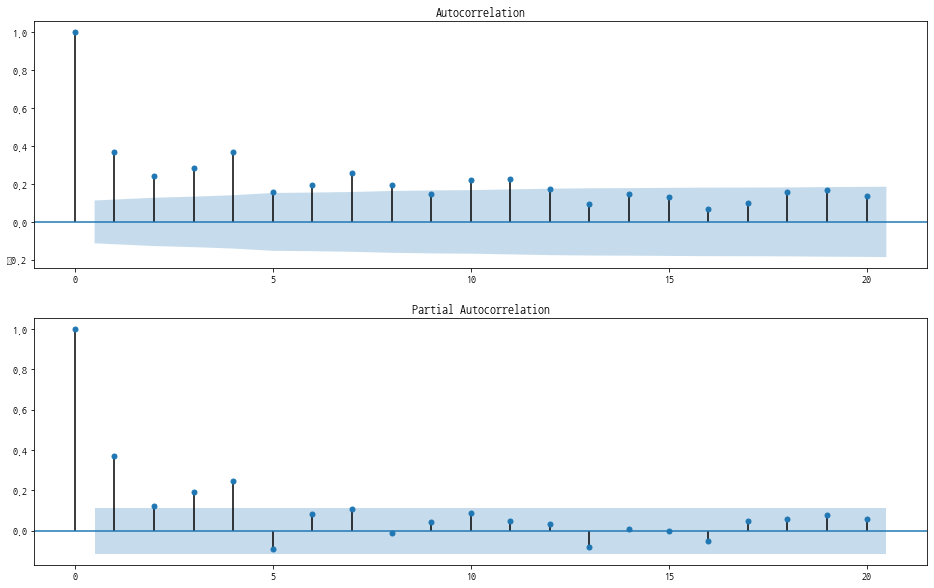

In [6]:
# ARIMA 모델
## ACF와 PACF 계산

import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(16,10))
# 그래프의 위치 설정
ax1=fig.add_subplot(211)
# ACF 그래프
fig = sm.graphics.tsa.plot_acf(train_arima['val'], lags=20, ax=ax1)
# 그래프의 위치 설정
ax2 = fig.add_subplot(212)
# PCAF 그래프
fig = sm.graphics.tsa.plot_pacf(train_arima['val'], lags=20,ax=ax2)

모수를 결정하는 기준은 아래와 같습니다.  

|Models|ACF|PACF|
|------|---------------|------------|
|AR(P)|점차 0에 접근|시차 P이후 0|
|MA(Q)|시차 Q 이후 0|점차 0에 접근|
|ARIMA(P,Q)|시차 Q이후 0|시차 P이후 0|

특히 위와 같이 ACF가 0으로 접근하지 않으면 차분을 하면 됩니다.  
차분을 진행하는 법은 아래와 같습니다.

In [ ]:
import copy as cp
differed = cp.deepcopy(train_arima)
differed = differed.diff().dropna()

차분의 결과에서 ACF와 PACF를 구해본 후 적절한 차분 횟수와 모수를 정할 수 있습니다.  
위의 그래프는 차분하지 않은 데이터이므로 D=0을 사용하면 됩니다.  
ACF가 잘 줄어드지 않는 것 같으니 차분을 해볼까요?

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


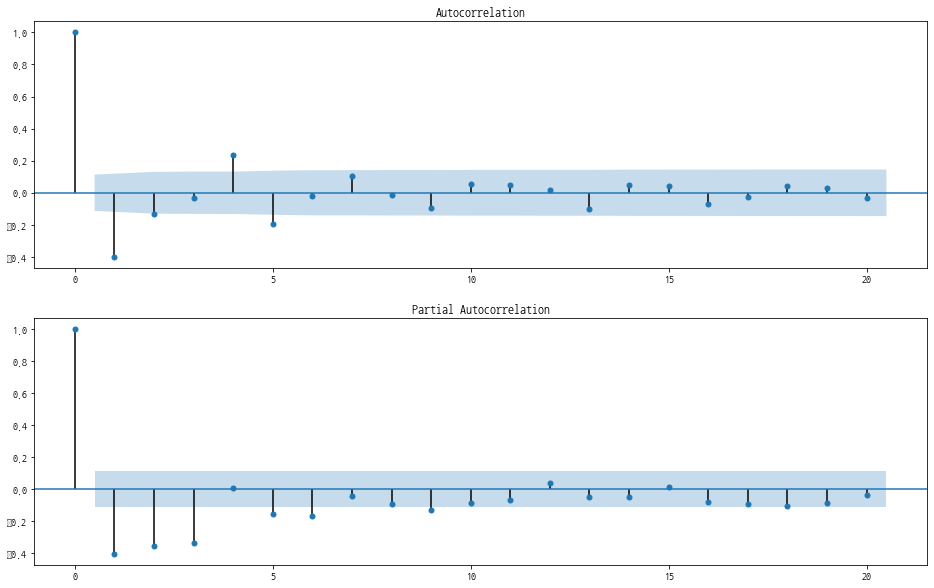

In [8]:

fig = plt.figure(figsize=(16,10))
# 그래프의 위치 설정
ax1=fig.add_subplot(211)
# ACF 그래프
fig = sm.graphics.tsa.plot_acf(differed['val'], lags=20, ax=ax1)
# 그래프의 위치 설정
ax2 = fig.add_subplot(212)
# PCAF 그래프
fig = sm.graphics.tsa.plot_pacf(differed['val'], lags=20,ax=ax2)

이번엔 위의 그래프에서 파란 값 범위 안에 근접하기 시작하는 P=4, Q=2을 선택하겠습니다.  
그리고 차분을 한 번 했으니 D=1로 하겠습니다.

In [14]:
p = 4
d = 1
q = 2

이제 이 값을 모수로 모델을 생성할 수 있습니다.  
다른 모수를 기준으로 모델을 생성해보며 결과가 어떻게 바뀌는지 확인하세요.

#### (실습 6) 여러분의 ARIMA 모델을 개선해보세요. 두 가지 이상 다른 설정을 추가해보세요.

In [7]:
# Hint : ARIMA 모델의 모수를 다르게 설정해보세요.
